In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

In [3]:
station = pd.read_csv("./.kaggle_data/station.csv")
status = pd.read_csv("./.kaggle_data/status.csv",chunksize=100)
trip = pd.read_csv("./.kaggle_data/trip.csv")
weather = pd.read_csv("./.kaggle_data/weather.csv")

In [4]:
trip.head(n=2)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138


In [5]:
def string_to_obj(string):
    [month,day,year] = string.split('/')
    return dt.date(int(year),int(month),int(day))

date_list = list(set([string.split(' ')[0] for string in trip["start_date"].values]))
date_list_sorted = sorted(date_list,key=string_to_obj)

weekend = [(string_to_obj(date).weekday() >= 5) for date in date_list_sorted]
num_days = len(date_list)

In [6]:
def trips_on_day(date):
    return trip[trip["start_date"].str.contains(re.compile(date))]

In [7]:
num_trips = [trip["start_date"].str.contains(re.compile(date)).sum() for date in date_list_sorted]

In [8]:
weekday_trips = np.array([[i,num_trips[i]] for i in range(num_days) if not weekend[i]])
weekend_trips = np.array([[i,num_trips[i]] for i in range(num_days) if weekend[i]])

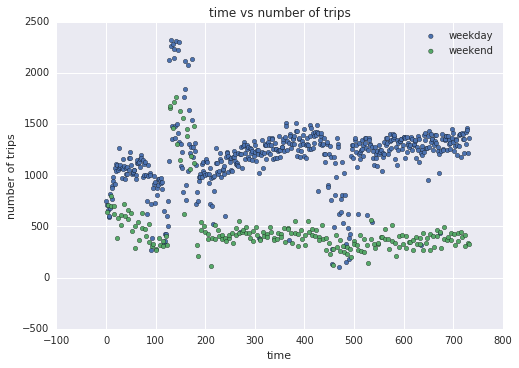

In [9]:
color = sns.color_palette()
plt.scatter(weekday_trips[:,0],weekday_trips[:,1],c = color[0],label = 'weekday')
plt.scatter(weekend_trips[:,0],weekend_trips[:,1],c = color[1],label = 'weekend')
plt.xlabel("time")
plt.ylabel("number of trips")
plt.title("time vs number of trips")
plt.legend()
plt.show()